In [1]:
import torch
import sys
import os.path as osp
import os
import sys
import numpy as np
from src.dataset.dataset import SimpleIterDataset, EventDataset
from src.utils.utils import to_filelist
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rc('font', size=13)
from src.plotting.plot_event import plot_event_comparison
from src.dataset.functions_data import concat_events

In [6]:

def remove_from_list(lst):
    out = []
    for item in lst:
        if item in ["hgcal", "data.txt", "test_file.root"]:
            continue
        out.append(item)
    return out

#path = "/eos/user/g/gkrzmanc/jetclustering/data/SVJ_std_UL2018_scouting_test_large/SVJ_mMed-700GeV_mDark-20GeV_rinv-0.7_alpha-peak"
def get_iter(path_to_root_file):
    datasets = [path_to_root_file]
    class Args:
        def __init__(self):
            self.data_train = datasets
            self.data_val = datasets
            #self.data_train = files_train
            self.data_config = '/work/gkrzmanc/jetclustering/code/config_files/config_jets_2_delphes.yaml'
            self.extra_selection = None
            self.train_val_split = 1
            self.data_fraction = 1
            self.file_fraction = 1
            self.fetch_by_files = False
            self.fetch_step = 1
            self.steps_per_epoch = None
            self.in_memory = False
            self.local_rank = None
            self.copy_inputs = False
            self.no_remake_weights = False
            self.batch_size = 10
            self.num_workers = 0
            self.demo = False
            self.laplace = False
            self.diffs = False
            self.class_edges = False

    args = Args()
    train_range = (0, args.train_val_split)
    train_file_dict, train_files = to_filelist(args, 'train')
    train_data = SimpleIterDataset(train_file_dict, args.data_config, for_training=True,
                                   extra_selection=args.extra_selection,
                                   remake_weights=True,
                                   load_range_and_fraction=(train_range, args.data_fraction),
                                   file_fraction=args.file_fraction,
                                   fetch_by_files=args.fetch_by_files,
                                   fetch_step=args.fetch_step,
                                   infinity_mode=False,
                                   in_memory=args.in_memory,
                                   async_load=False,
                                   name='train', jets=True)

    iterator = iter(train_data)

    return iterator


In [14]:
dataset = iter(EventDataset.from_directory("/pnfs/psi.ch/cms/trivcat/store/user/gkrzmanc/jetclustering/preprocessed_data/Delphes_020425_test_PU_PFfix_part0/SVJ_mZprime-900_mDark-20_rinv-0.3_alpha-peak"))#/pnfs/psi.ch/cms/trivcat/store/user/gkrzmanc/jetclustering/preprocessed_data/Delphes_020425_test_PU_PFfix_part0/SVJ_mZprime-900_mDark-20_rinv-0.3_alpha-peak""))

File: final_parton_level_particles.pkl
File: pfcands.pkl
File: matrix_element_gen_particles.pkl
File: final_gen_particles.pkl
get_pfcands_key


In [4]:
evt = next(dataset)

{'n_fat_jets': array([[1.]], dtype=float32), 'fat_jets': array([[287.625     ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.45243597,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          

In [9]:
labels = ["scounting PFCands", "genParticles", "parton level"]
colors = ["gray", "blue", "red"]
classes = ["pfcands", "final_gen_particles", "final_parton_level_particles"]


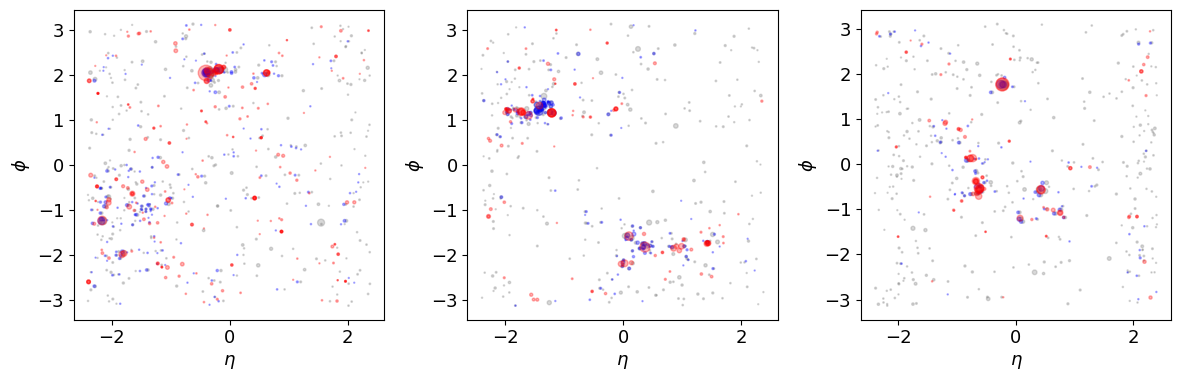

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for k in range(3):
    evt = next(dataset)
    for i in range(3):
        pt = getattr(evt, classes[i]).pt
        eta = getattr(evt, classes[i]).eta
        phi = getattr(evt, classes[i]).phi
        eta_dq, phi_dq  = evt.matrix_element_gen_particles.eta, evt.matrix_element_gen_particles.phi
        pt_dq = evt.matrix_element_gen_particles.pt
        #ax[i].scatter(eta, phi, s=pt, color=colors[i], alpha=0.3)
        # plot the matrix element gen particles - with a size of pt and a blue triangle symbol
        #ax[i].scatter(eta_dq, phi_dq, s=pt_dq, color="blue", alpha=0.3, marker="^")
        #ax[i].set_title(labels[i])
        ax[k].set_xlabel("$\eta$")
        ax[k].set_ylabel("$\phi$")
        ax[k].scatter(eta, phi, s=pt, color=colors[i], alpha=0.3, label=labels[i])
        # put PID where the circles are
        #for j, txt in enumerate(getattr(evt, classes[i]).pid):
        #    ax[i].annotate(txt.int().item(), (eta[j], phi[j]), size=5)
    #ax[-1].set_title("all")
fig.tight_layout()
fig.savefig("/work/gkrzmanc/jetclustering/results/event_example.pdf")
fig.show()

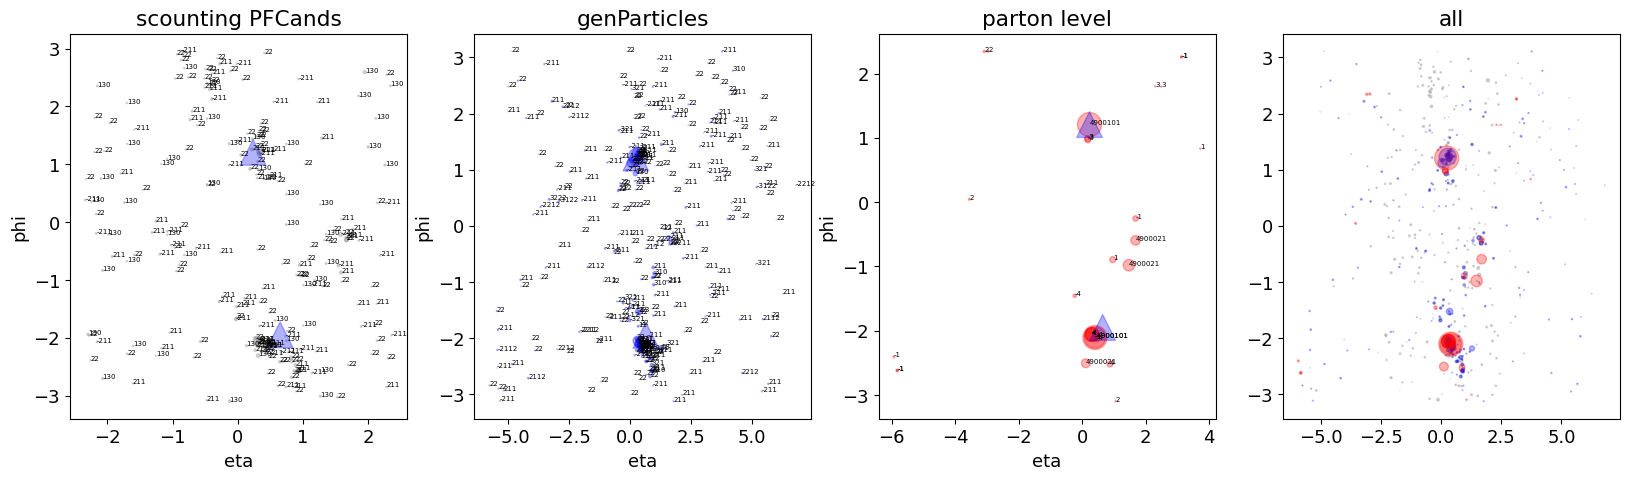

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i in range(3):
    pt = getattr(evt, classes[i]).pt
    eta = getattr(evt, classes[i]).eta
    phi = getattr(evt, classes[i]).phi
    eta_dq, phi_dq  = evt.matrix_element_gen_particles.eta, evt.matrix_element_gen_particles.phi
    pt_dq = evt.matrix_element_gen_particles.pt
    ax[i].scatter(eta, phi, s=pt, color=colors[i], alpha=0.3)
    # plot the matrix element gen particles - with a size of pt and a blue triangle symbol
    ax[i].scatter(eta_dq, phi_dq, s=pt_dq, color="blue", alpha=0.3, marker="^")
    #ax[i].set_title(labels[i])
    ax[i].set_xlabel("eta")
    ax[i].set_ylabel("phi")
    ax[-1].scatter(eta, phi, s=pt, color=colors[i], alpha=0.3, label=labels[i])
    # put PID where the circles are
    for j, txt in enumerate(getattr(evt, classes[i]).pid):
        ax[i].annotate(txt.int().item(), (eta[j], phi[j]), size=5)
ax[-1].set_title("all")
fig.savefig("/work/gkrzmanc/jetclustering/results/event_with_PIDs.pdf")
fig.show()

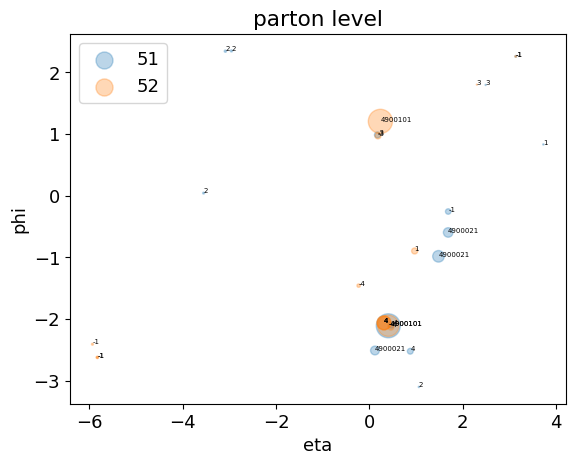

In [7]:
fig, ax = plt.subplots()
# plot status 51 and 52 with differnt colors
status = evt.final_parton_level_particles.status.int()
# also keep the plot style as from above
pt = evt.final_parton_level_particles.pt
eta = evt.final_parton_level_particles.eta
phi = evt.final_parton_level_particles.phi

statuses = torch.unique(status)
for s in statuses:
    status_filt = status == s
    ax.scatter(eta[status_filt], phi[status_filt], s=pt[status_filt], alpha=0.3, label=s.item())

ax.set_title("parton level")
ax.set_xlabel("eta")
ax.legend()
ax.set_ylabel("phi")
# put PID where the circles are
for j, txt in enumerate(evt.final_parton_level_particles.pid):
    ax.annotate(txt.int().item(), (eta[j], phi[j]), size=5)
fig.show()
fig.savefig("/work/gkrzmanc/jetclustering/results/event_with_PIDs_parton_level_status.pdf")

In [8]:
ds = EventDataset.from_directory("/work/gkrzmanc/jetclustering/preprocessed_data/Feb26_2025_E1000_N500_folders/PFNano_s-channel_mMed-700_mDark-20_rinv-0.7_alpha-peak_13TeV-pythia8_n-1000")

get_pfcands_key


In [9]:
ds[0].final_gen_particles.pid

tensor([  321.,  -211.,   321.,  3122., -2212.,   321.,  -211.,   211.,  -211.,
         -321.,  -211.,  -211.,   211.,  -211.,  3112., -3312.,  -321.,  -211.,
         2212.,   211., -2212.,   211., -2112.,   130.,   310.,  -321.,   130.,
         -211.,   130.,   211.,   310.,   211.,  -211.,   211.,  -211.,   211.,
          211.,  2112.,   211.,  -211.,  -211.,    22.,   211.,  -211.,    22.,
           22.,   321.,  -321.,    22.,    22.,  -211.,    22.,    22.,    22.,
           22.,    22.,    22.,    22.,    22.,  -211.,    22.,    22.,    22.,
           22.,    22.,    22.,    22.,    22.,   211.,   211.,  2112., -2112.,
         -211.,   130.,   130.,   321.,  -211.,   130.,  -211.,   211.,   211.,
         -211.,    22.,    22.,    22.,    22.,    22.,    22.],
       dtype=torch.float64)